# Component Model Notebook

Common spatial models can be created using functions in the astroviper.model package. Supported models are
* elliptical disk
* 2d gaussian
* point source collection

In [43]:
# imports

from astroviper.model import make_disk, make_gauss2d, make_pt_sources
import numpy as np, xarray as xr

In [44]:
# create a regular coordinate grid
x = np.linspace(-5, 5, 101)
y = x.copy()
x,y

(array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
        -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
        -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8,
        -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
        -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
         0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
         1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
         2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
         3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
         4.9,  5. ]),
 array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
        -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
        -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8,
        -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
        -0.6, -0

In [45]:
# create the base array, all zeros
base = xr.DataArray(np.zeros((y.size, x.size)), coords={"y": y, "x": x}, dims=("y", "x"))
base

<xarray.DataArray (y: 101, x: 101)> Size: 82kB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * y        (y) float64 808B -5.0 -4.9 -4.8 -4.7 -4.6 ... 4.6 4.7 4.8 4.9 5.0
  * x        (x) float64 808B -5.0 -4.9 -4.8 -4.7 -4.6 ... 4.6 4.7 4.8 4.9 5.0

## Disk

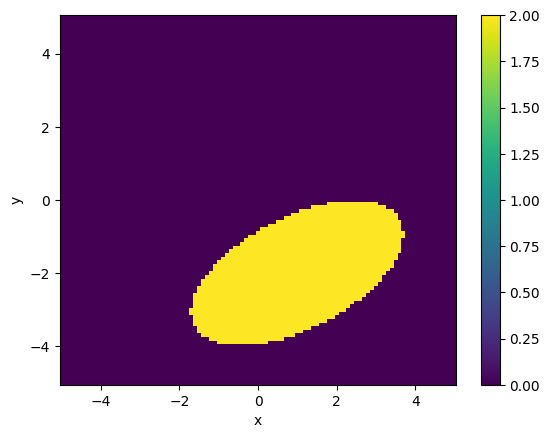

In [46]:
# a, b semi-majr, semi-minor, theta - angle between positive x axis and a, measured toward positive y,
# x0, y0, center coordinates, A value inside the disk.
disk = make_disk(base, a=3.0, b=1.5, theta=np.deg2rad(30), x0=1.0, y0=-2.0, A=2.0)
disk.plot()

In [47]:
# reverse the x coord so that it increases to the left, common in equatorial systems
base_flipped = base.sortby("x", ascending=False) 
base_flipped

<xarray.DataArray (y: 101, x: 101)> Size: 82kB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * y        (y) float64 808B -5.0 -4.9 -4.8 -4.7 -4.6 ... 4.6 4.7 4.8 4.9 5.0
  * x        (x) float64 808B 5.0 4.9 4.8 4.7 4.6 ... -4.6 -4.7 -4.8 -4.9 -5.0

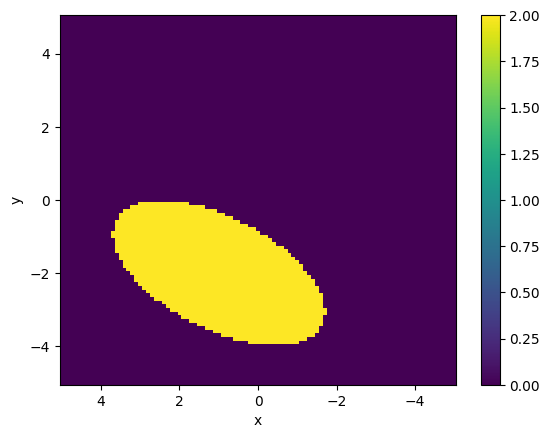

In [50]:
disk_flipped = make_disk(base_flipped, a=3.0, b=1.5, theta=np.deg2rad(30), x0=1.0, y0=-2.0, A=2.0)
qm = disk_flipped.plot()
# by default, matplotlib plots x increasing to left, even if coords
# are reversed, so for plots, have to invert axis after plotting
# the point is that make disk does the right thing if the x coord
# values increase to the left
qm.axes.invert_xaxis()

## 2D Gaussian

This is the usual shape of restoring beams

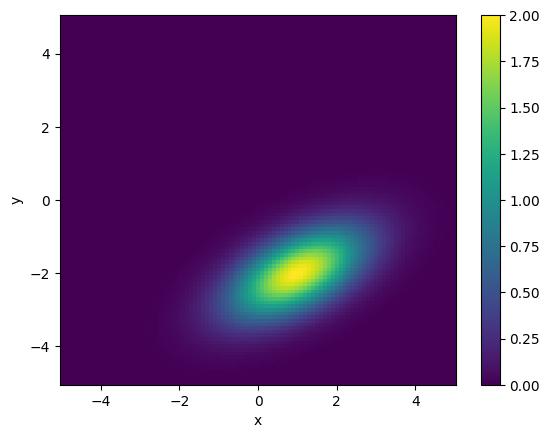

In [53]:
gauss2d = make_gauss2d(base, a=3.0, b=1.5, theta=np.deg2rad(30), x0=1.0, y0=-2.0, A=2.0)
gauss2d.plot()

## Collection of Point Sources

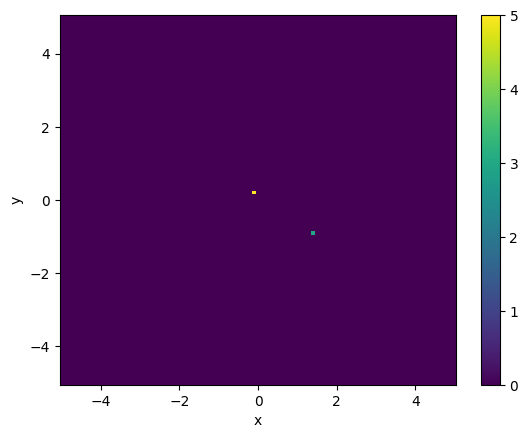

In [55]:
pt_srcs= make_pt_sources(base, amplitudes=[5, 3], xs=[-0.1, 1.4], ys=[0.2, -0.9])
pt_srcs.plot()